# Plot ripple matches

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import jax
jax.config.update("jax_enable_x64", True)
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

params = {"axes.grid": True,
          "text.usetex" : True,
          "font.family" : "serif",
          "ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.serif" : ["Computer Modern Serif"],
          "xtick.labelsize": 16,
          "ytick.labelsize": 16,
          "axes.labelsize": 16,
          "legend.fontsize": 16,
          "legend.title_fontsize": 16,
          "figure.titlesize": 16}

plt.rcParams.update(params)

### Auxiliary functions
def get_chi_eff(chi1, chi2, m1, m2):
    return (chi1 * m1 + chi2 * m2) / (m1 + m2)

def get_chirp_mass(m1, m2):
    return (m1 * m2)**(3/5) / (m1 + m2)**(1/5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read in mismatch data

In [8]:
# Hyperparameter: do we vary the extrinsic parameters or not
vary_extrinsic = False

# Choose tidal waveform here
approximant_names = ["IMRPhenomD",
                     "IMRPhenomD_NRTidalv2", 
                     "TaylorF2"]

approximant_names_latex = [r"IMRPhenomD",
                           r"IMRPhenomD\_NRTidalv2", 
                           r"TaylorF2"]

matches_dict = {}
for approximant in approximant_names:

    if vary_extrinsic:
        matches_filename = os.path.join(os.getcwd(), f"../data/check_{approximant}_matches_vary_extrinsic.csv")
    else:
        matches_filename = os.path.join(os.getcwd(), f"../data/check_{approximant}_matches.csv")
    print(f"Reading in matches from {matches_filename}")
    matches_df = pd.read_csv(matches_filename)

    ### Get the values
    m1_values = matches_df["m1"].values
    m2_values = matches_df["m2"].values
    q_values = matches_df["m2"] / matches_df["m1"].values
    chi1_values = matches_df["chi1"].values
    chi2_values = matches_df["chi2"].values
    mismatch_values = matches_df["mismatch"].values
    if approximant != "IMRPhenomD":
        lambda1_values = matches_df["lambda1"].values
        lambda2_values = matches_df["lambda2"].values
    else:
        lambda1_values = np.zeros(len(m1_values))
        lambda2_values = np.zeros(len(m1_values))

    # Add matches to dictionary
    matches_dict[approximant] = {} 
    matches_dict[approximant]["m1"] = m1_values
    matches_dict[approximant]["m2"] = m2_values
    matches_dict[approximant]["q"] = q_values
    matches_dict[approximant]["chi1"] = chi1_values
    matches_dict[approximant]["chi2"] = chi2_values
    matches_dict[approximant]["mismatch"] = mismatch_values
    matches_dict[approximant]["lambda1"] = lambda1_values
    matches_dict[approximant]["lambda2"] = lambda2_values

Reading in matches from /Users/Woute029/Documents/Code/TurboPE-BNS/postprocessing/../data/check_IMRPhenomD_matches.csv
Reading in matches from /Users/Woute029/Documents/Code/TurboPE-BNS/postprocessing/../data/check_IMRPhenomD_NRTidalv2_matches.csv
Reading in matches from /Users/Woute029/Documents/Code/TurboPE-BNS/postprocessing/../data/check_TaylorF2_matches.csv


Below, we show the prior which was used to sample the GW parameters from
```python
m_l, m_u = 0.5, 3.0
chi_l, chi_u = -0.05, 0.05
lambda_l, lambda_u = 0, 5000

m1 = np.random.uniform(m_l, m_u)
m2 = np.random.uniform(m_l, m_u)
s1 = np.random.uniform(chi_l, chi_u)
s2 = np.random.uniform(chi_l, chi_u)
l1 = np.random.uniform(lambda_l, lambda_u)
l2 = np.random.uniform(lambda_l, lambda_u)


dist_mpc = np.random.uniform(0, 1000)
tc = 0.0
inclination = np.random.uniform(0, 2*np.pi)
phi_ref = np.random.uniform(0, 2*np.pi)
```

## Plot the mismatch histograms

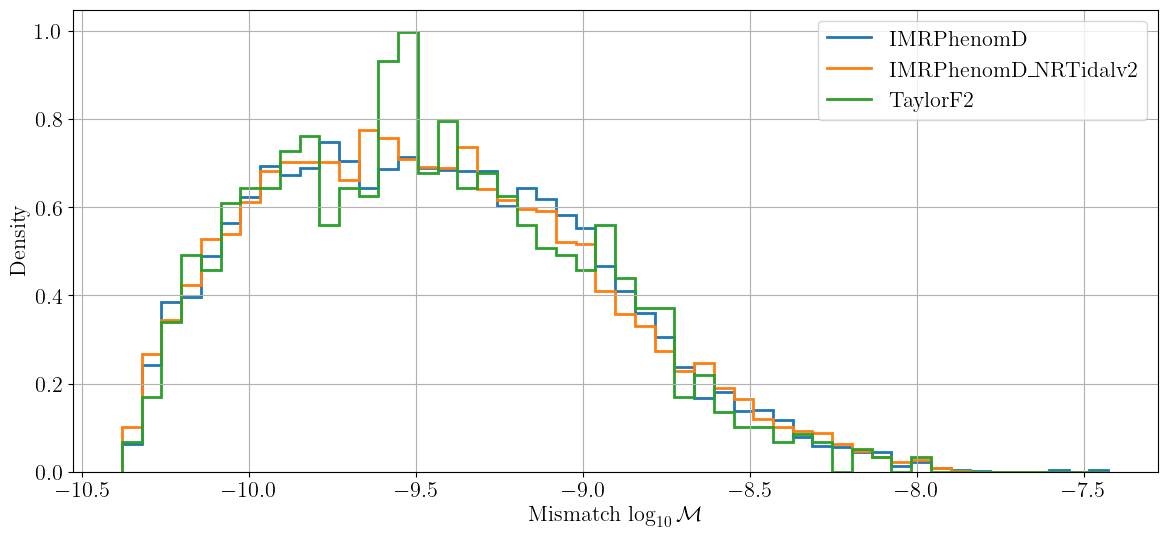

In [16]:
plt.figure(figsize = (10, 6))
counter = 0
for key, value in matches_dict.items():
    latex_label = approximant_names_latex[counter]
    mismatch_values = value["mismatch"]
    if counter == 0:
        counts, bins = np.histogram(mismatch_values, bins = 50, density=True)
    else:
        counts, _ = np.histogram(mismatch_values, bins = bins, density=True)
    plt.stairs(counts, bins, linewidth=2, label=latex_label)
    # plt.hist(mismatch_values, bins=50, histtype='step', linewidth=3, density=True, label=latex_label)
    
    counter += 1

plt.xlabel(r"Mismatch $\log_{10} \mathcal{M}$")
plt.legend()
plt.ylabel("Density")
plt.savefig("../outdir/mismatch_histogram.pdf", bbox_inches="tight")
plt.show()

## Similar but varying extrinsic parameters

In [17]:
# Hyperparameter: do we vary the extrinsic parameters or not
vary_extrinsic = True

# Choose tidal waveform here
approximant_names = ["IMRPhenomD",
                     "IMRPhenomD_NRTidalv2", 
                     "TaylorF2"]

approximant_names_latex = [r"IMRPhenomD",
                           r"IMRPhenomD\_NRTidalv2", 
                           r"TaylorF2"]

matches_dict = {}
for approximant in approximant_names:

    if vary_extrinsic:
        matches_filename = os.path.join(os.getcwd(), f"../data/check_{approximant}_matches_vary_extrinsic.csv")
    else:
        matches_filename = os.path.join(os.getcwd(), f"../data/check_{approximant}_matches.csv")
    print(f"Reading in matches from {matches_filename}")
    matches_df = pd.read_csv(matches_filename)

    ### Get the values
    m1_values = matches_df["m1"].values
    m2_values = matches_df["m2"].values
    q_values = matches_df["m2"] / matches_df["m1"].values
    chi1_values = matches_df["chi1"].values
    chi2_values = matches_df["chi2"].values
    mismatch_values = matches_df["mismatch"].values
    if approximant != "IMRPhenomD":
        lambda1_values = matches_df["lambda1"].values
        lambda2_values = matches_df["lambda2"].values
    else:
        lambda1_values = np.zeros(len(m1_values))
        lambda2_values = np.zeros(len(m1_values))

    # Add matches to dictionary
    matches_dict[approximant] = {} 
    matches_dict[approximant]["m1"] = m1_values
    matches_dict[approximant]["m2"] = m2_values
    matches_dict[approximant]["q"] = q_values
    matches_dict[approximant]["chi1"] = chi1_values
    matches_dict[approximant]["chi2"] = chi2_values
    matches_dict[approximant]["mismatch"] = mismatch_values
    matches_dict[approximant]["lambda1"] = lambda1_values
    matches_dict[approximant]["lambda2"] = lambda2_values

Reading in matches from /Users/Woute029/Documents/Code/TurboPE-BNS/postprocessing/../data/check_IMRPhenomD_matches_vary_extrinsic.csv
Reading in matches from /Users/Woute029/Documents/Code/TurboPE-BNS/postprocessing/../data/check_IMRPhenomD_NRTidalv2_matches_vary_extrinsic.csv
Reading in matches from /Users/Woute029/Documents/Code/TurboPE-BNS/postprocessing/../data/check_TaylorF2_matches_vary_extrinsic.csv


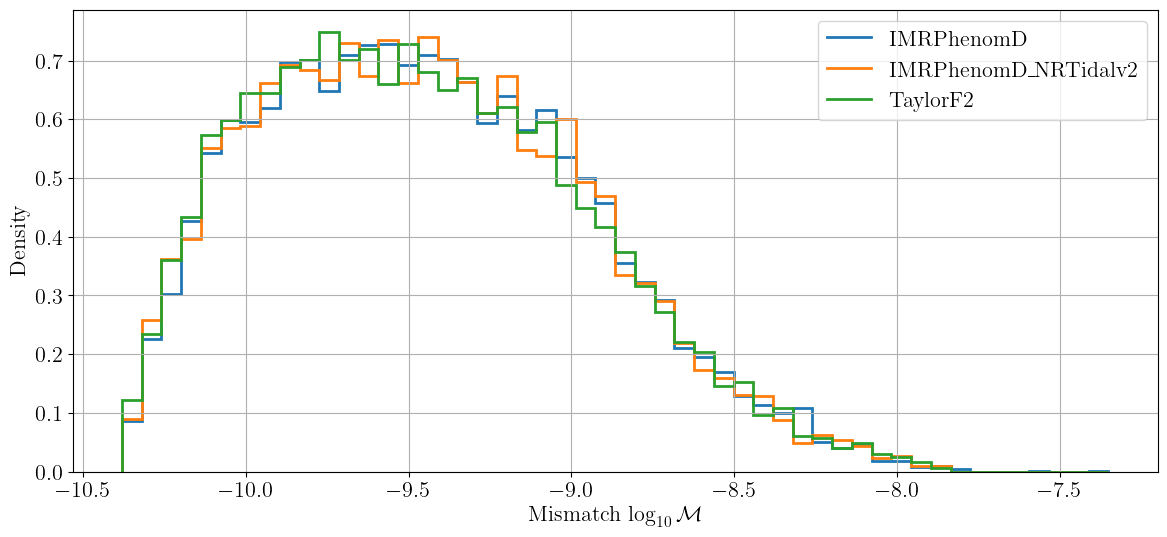

In [18]:
plt.figure(figsize = (14, 6))
counter = 0
for key, value in matches_dict.items():
    latex_label = approximant_names_latex[counter]
    mismatch_values = value["mismatch"]
    if counter == 0:
        counts, bins = np.histogram(mismatch_values, bins = 50, density=True)
    else:
        counts, _ = np.histogram(mismatch_values, bins = bins, density=True)
    plt.stairs(counts, bins, linewidth=2, label=latex_label)
    counter += 1

plt.xlabel(r"Mismatch $\log_{10} \mathcal{M}$")
plt.legend()
plt.ylabel("Density")
plt.savefig("../outdir/mismatch_histogram_vary_extrinsic.pdf", bbox_inches="tight")
plt.show()